# Research

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import time

In [2]:
df_quotes = pd.read_csv("ft_quotes.csv",index_col=0,parse_dates=True).sort_index(ascending=True).fillna(method="ffill").dropna(axis=1)
df_quotes.index = [x.date() for x in df_quotes.index]
df_perform = pd.read_csv("ft_funds_perform.csv", index_col=0)
df_cat_perform = pd.read_csv("ft_cat_perform.csv", index_col=0)

max_date = df_quotes.index.max()
w1_ago = max_date-timedelta(days=7)
w1_ago = df_quotes[df_quotes.index <= w1_ago].index.max()
d1_ago = max_date-timedelta(days=1)
d1_ago = df_quotes[df_quotes.index <=d1_ago].index.max()
w2_ago = max_date-timedelta(days=14)
w2_ago = df_quotes[df_quotes.index <= w2_ago].index.max()

df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[d1_ago]-1).rename('1 day'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w1_ago]-1).rename('1 week'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w2_ago]-1).rename('2 week'))

### Short term

In [3]:
df_perform.sort_values(by="1 day", ascending=False).dropna()

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU1147734682,-0.0005,-0.0400,-0.0538,-0.0499,-0.0364,-0.0113,Global Bond,Goldman Sachs Global Sovereign Bond Portfolio ...,USD,4,4,0.025484,-0.004088,0.000999
LU1147734765,-0.0004,-0.0400,-0.0539,-0.0499,-0.0364,-0.0113,Global Bond,Goldman Sachs Global Sovereign Bond Portfolio ...,USD,4,4,0.025462,-0.004155,0.001019
LU0073232471,0.0369,-0.1170,-0.0326,0.0858,0.0397,0.0137,US Large-Cap Growth Equity,Morgan Stanley Investment Funds - US Growth Fu...,USD,1,7,0.018867,-0.001667,0.081181
LU0266117414,-0.0083,-0.1698,-0.0004,0.0889,0.0279,-0.0100,Other Equity,Morgan Stanley Investment Funds - US Growth Fu...,EUR,0,7,0.018812,-0.001780,0.080341
LU0225737302,0.0199,-0.1146,0.0004,0.0600,-0.0052,-0.0102,US Large-Cap Growth Equity,Morgan Stanley Investment Funds - US Advantage...,USD,1,7,0.017274,-0.007342,0.061601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU0522352862,0.0539,0.1034,0.0854,0.0598,0.0142,-0.0071,Latin America Equity,JPMorgan Funds - Latin America Equity Fund D (...,EUR,4,7,-0.023701,-0.025335,-0.024168
LU0399356780,0.1332,0.1620,0.0783,0.0901,0.0171,-0.0126,Latin America Equity,DWS Invest Latin American Equities LC,EUR,5,7,-0.024944,-0.029587,-0.036251
LU0318936589,0.0468,0.0410,0.0264,0.1486,0.0074,-0.0228,Brazil Equity,JPMorgan Funds - Brazil Equity Fund D (acc) - USD,USD,3,7,-0.026042,-0.034423,-0.032759
LU0522352789,0.0467,0.0409,0.0233,0.1469,0.0051,-0.0250,Brazil Equity,JPMorgan Funds - Brazil Equity Fund D (acc) - EUR,EUR,3,7,-0.026598,-0.023893,-0.025698


In [4]:
df_perform[df_perform['rating']>=3].sort_values(by="1 day", ascending=False).dropna().head(20)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU1147734682,-0.0005,-0.0400,-0.0538,-0.0499,-0.0364,-0.0113,Global Bond,Goldman Sachs Global Sovereign Bond Portfolio ...,USD,4,4,0.025484,-0.004088,0.000999
LU1147734765,-0.0004,-0.0400,-0.0539,-0.0499,-0.0364,-0.0113,Global Bond,Goldman Sachs Global Sovereign Bond Portfolio ...,USD,4,4,0.025462,-0.004155,0.001019
IE00B1L8MC56,0.0943,0.2188,0.0122,0.1211,0.1180,0.0594,India Equity,Nomura Funds Ireland plc - India Equity Fund C...,USD,3,6,0.013992,0.019536,0.033825
LU0117885052,0.1439,0.0677,0.1867,0.1763,0.0312,0.0193,Sector Equity Technology,JPMorgan Funds - US Technology Fund D (acc) - USD,USD,4,7,0.013641,-0.007194,0.056893
IE00B3SHDY84,0.0938,0.2176,0.0114,0.1279,0.1159,0.0571,India Equity,Nomura Funds Ireland plc - India Equity Fund C...,EUR,4,6,0.012374,0.030982,0.041655
LU0090841262,0.0779,-0.1137,0.0770,-0.0187,-0.0956,-0.0004,Sector Equity Precious Metals,BlackRock Global Funds - World Gold Fund E2,USD,3,7,0.011159,-0.038343,-0.008121
LU0197229882,0.0774,0.1518,-0.0172,0.0578,0.0565,0.0390,India Equity,Fidelity Funds - India Focus Fund A-USD,USD,3,6,0.011118,0.014680,0.025824
LU0267984697,0.0741,0.1766,-0.0028,0.0974,0.0820,0.0585,India Equity,Invesco Funds - Invesco India Equity Fund E Ac...,EUR,3,6,0.011115,0.029109,0.043299
LU0197230542,0.0772,0.1516,-0.0178,0.0567,0.0561,0.0386,India Equity,Fidelity Funds - India Focus Fund A-EUR,EUR,3,6,0.010557,0.021872,0.033307
LU0264410720,0.0614,0.1348,-0.0369,0.0654,0.0745,0.0365,India Equity,Schroder International Selection Fund Indian E...,USD,3,6,0.010306,0.016060,0.029002


In [5]:
df_perform.sort_values(by="1 week", ascending=False).dropna()

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0213962813,0.2829,0.4811,0.7676,0.1757,0.3741,0.1273,Turkey Equity,HSBC Global Investment Funds - Turkey Equity EC,EUR,4,7,0.006381,0.043415,0.084910
LU0329071053,0.0800,0.2339,0.1189,0.1699,0.1478,0.0660,India Equity,Jupiter India Select Class L GBP A Inc,GBP,1,6,0.009645,0.039317,0.043045
LU0329070915,0.0799,0.2337,0.1210,0.1692,0.1514,0.0677,India Equity,Jupiter India Select Class L EUR Acc,EUR,1,6,0.012234,0.036783,0.041836
LU0823433858,0.1897,0.3476,0.7231,0.2029,0.4074,0.1605,Turkey Equity,BNP Paribas Funds Turkey EquityNR,EUR,3,7,0.000000,0.034802,0.066465
IE00B3SHDY84,0.0938,0.2176,0.0114,0.1279,0.1159,0.0571,India Equity,Nomura Funds Ireland plc - India Equity Fund C...,EUR,4,6,0.012374,0.030982,0.041655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU0823426720,-0.0078,-0.1503,-0.1809,-0.1688,-0.0491,-0.0498,China Equity,BNP Paribas Funds China Equity N Capitalisation,USD,3,6,0.000000,-0.044314,0.007150
LU0404923640,-0.0186,-0.1279,-0.2055,-0.1732,-0.0318,-0.0504,China Equity,Goldman Sachs All China Equity Portfolio Base ...,USD,3,6,-0.003577,-0.044582,0.000718
LU0188151178,-0.0673,-0.1748,-0.2144,-0.1708,-0.0407,-0.0597,China Equity,Templeton China Fund N(acc)USD,USD,1,6,-0.005799,-0.045547,-0.003698
IE00B19Z4B17,0.0718,0.1850,-0.0009,-0.0643,-0.0140,-0.0293,US Small-Cap Equity,Legg Mason Royce US Small Cap Opportunity Fund...,USD,2,7,-0.003876,-0.049298,-0.006144


In [6]:

df_perform[df_perform['rating']>=3].sort_values(by="1 week", ascending=False).dropna().head(20)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0213962813,0.2829,0.4811,0.7676,0.1757,0.3741,0.1273,Turkey Equity,HSBC Global Investment Funds - Turkey Equity EC,EUR,4,7,0.006381,0.043415,0.084910
LU0823433858,0.1897,0.3476,0.7231,0.2029,0.4074,0.1605,Turkey Equity,BNP Paribas Funds Turkey EquityNR,EUR,3,7,0.000000,0.034802,0.066465
IE00B3SHDY84,0.0938,0.2176,0.0114,0.1279,0.1159,0.0571,India Equity,Nomura Funds Ireland plc - India Equity Fund C...,EUR,4,6,0.012374,0.030982,0.041655
LU0267984697,0.0741,0.1766,-0.0028,0.0974,0.0820,0.0585,India Equity,Invesco Funds - Invesco India Equity Fund E Ac...,EUR,3,6,0.011115,0.029109,0.043299
LU0255979154,0.0649,0.1316,-0.0275,0.0761,0.0769,0.0380,India Equity,Pictet-Indian Equities R EUR,EUR,3,6,0.003413,0.024055,0.032501
LU0424370004,0.0286,0.0122,-0.0303,-0.0948,-0.0284,0.0135,Systematic Trend EUR,Man AHL Trend Alternative DNY H EUR Acc,EUR,4,6,0.000000,0.023721,-0.000834
LU0286668966,-0.0551,-0.1211,-0.0357,-0.1625,-0.0394,-0.0075,Asia High Yield Bond,Fidelity Funds - Asian High Yield Fund A-Acc-EUR,EUR,3,5,0.002007,0.023224,0.015593
LU0333810850,0.0922,0.1790,-0.0009,0.1070,0.0877,0.0504,India Equity,Goldman Sachs India Equity Portfolio E Acc EUR,EUR,4,6,0.006155,0.022706,0.035664
LU0197230542,0.0772,0.1516,-0.0178,0.0567,0.0561,0.0386,India Equity,Fidelity Funds - India Focus Fund A-EUR,EUR,3,6,0.010557,0.021872,0.033307
IE00B1L8MC56,0.0943,0.2188,0.0122,0.1211,0.1180,0.0594,India Equity,Nomura Funds Ireland plc - India Equity Fund C...,USD,3,6,0.013992,0.019536,0.033825


In [7]:
df_perform[(df_perform['risk']<=1) & (df_perform['currency']=="EUR")].sort_values(by="2 week", ascending=False).dropna().head(20)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0261953490,-0.0116,-0.0144,0.0093,-0.0231,0.0067,-0.0011,EUR Money Market,Fidelity Funds - Sustainable Euro Cash Fund A-...,EUR,0,1,0.000000,0.000948,0.001898
LU1089088741,-0.0065,-0.0132,0.0148,-0.0215,0.0085,0.0007,EUR Ultra Short-Term Bond,Allianz Global Investors Fund - Allianz Floati...,EUR,4,1,0.000199,0.000798,0.001698
LU0136043550,-0.0103,-0.0169,0.0109,-0.0220,0.0084,0.0002,Money Market - Other,Schroder International Selection Fund EURO Liq...,EUR,0,1,0.000172,0.000689,0.001378
LU0128495834,-0.0097,-0.0160,0.0112,-0.0229,0.0071,0.0004,EUR Money Market - Short Term,Pictet-Short-Term Money Market EUR R,EUR,0,1,0.000307,0.000691,0.001305
LU0568620727,-0.0094,-0.0131,0.0096,-0.0235,0.0066,-0.0014,EUR Money Market,Amundi Funds - Cash EUR G2 EUR (C),EUR,0,1,0.000000,0.000503,0.001208
LU0252500524,-0.0093,-0.0130,0.0078,-0.0251,0.0056,-0.0016,EUR Money Market - Short Term,JPMorgan Funds - EUR Money Market VNAV Fund D ...,EUR,0,1,0.000094,0.000561,0.001123
LU0064964074,-0.0116,-0.0144,0.0093,-0.0230,0.0067,-0.0011,EUR Money Market,Fidelity Funds - Sustainable Euro Cash Fund A-...,EUR,0,1,0.000000,0.001120,0.001120
LU0293294434,-0.0113,-0.0198,0.0044,-0.0239,0.0061,-0.0004,EUR Ultra Short-Term Bond,Allianz Global Investors Fund - Allianz Enhanc...,EUR,2,1,0.000291,0.000000,0.000971
LU0042866854,-0.0123,-0.0171,0.0025,-0.0244,0.0058,-0.0015,EUR Money Market,Eurizon Fund - Cash EUR Class Unit R EUR Accum...,EUR,0,1,0.000000,0.000367,0.000917
LU0432366952,-0.0118,-0.0186,0.0059,-0.0251,0.0066,0.0003,EUR Money Market - Short Term,BlackRock Global Funds - Euro Reserve Fund E2 EUR,EUR,0,1,0.000000,0.000292,0.000876


In [8]:
df_perform.loc['LU1997245177']

5 years                                                   0.0667
3 years                                                  -0.1008
1 year                                                   -0.2906
6 months                                                 -0.1946
3 months                                                  -0.026
1 month                                                  -0.0607
ft category                              China Equity - A Shares
name           Allianz Global Investors Fund - Allianz China ...
currency                                                     USD
rating                                                         5
risk                                                           6
1 day                                                        0.0
1 week                                                 -0.014259
2 week                                                  0.008755
Name: LU1997245177, dtype: object

### Category 

In [9]:
df_cat_perform.drop(columns=["3 years","6 months"],inplace=True)
df_perform_group_by = df_perform.groupby(by="ft category")
df_cat_perform = df_cat_perform.join(df_perform_group_by.median()['1 month'].rename('1 m mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.median()['1 day'].rename('1 day median'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.mean()['1 day'].rename('1 day mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.max()['1 month'].rename('1 m max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.count()['1 month'].rename('count'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.median()['1 week'].rename('1 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.max()['1 week'].rename('1 w max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.median()['2 week'].rename('2 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by.max()['2 week'].rename('2 w max'))

In [10]:
df_cat_perform.sort_values(by="1 w mean",ascending=False).head(20)

,5 years,1 year,3 months,1 month,1 m mean,1 day median,1 day mean,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,
Turkey Equity,0.2382,0.7012,0.3005,0.1221,0.14390,0.003190,0.003190,0.1605,2,0.039108,0.043415,0.075687,0.084910
Systematic Trend EUR,0.0058,-0.0408,0.0002,0.0011,0.01350,0.000000,0.000000,0.0135,1,0.023721,0.023721,-0.000834,-0.000834
India Equity,0.0826,-0.0098,0.0683,0.0431,0.04055,0.008332,0.008325,0.0677,26,0.019242,0.039317,0.032268,0.044253
Systematic Trend USD,0.0594,-0.0823,0.0167,0.0383,0.03940,0.000000,0.000000,0.0394,1,0.019194,0.019194,-0.000126,-0.000126
Asia High Yield Bond,-0.0422,-0.0625,-0.0294,0.0056,0.00575,0.000000,-0.000232,0.0147,10,0.015684,0.028560,0.021313,0.039887
Equity Market Neutral Other,NaN,NaN,NaN,NaN,0.02650,0.000000,0.000000,0.0265,1,0.011408,0.011408,0.009479,0.009479
Options Trading,-0.0858,-0.1175,-0.0633,0.0054,0.02125,0.000000,0.000517,0.0239,4,0.006380,0.014212,-0.002115,0.011127
Multistrategy EUR,-0.0062,0.0100,0.0108,0.0037,0.00340,0.000459,0.000790,0.0296,10,0.005037,0.011711,0.002946,0.017905
Japan Flex-Cap Equity,0.0153,0.0818,0.0045,0.0268,0.03855,-0.011638,-0.009390,0.0407,4,0.004659,0.012805,0.041953,0.047147


In [11]:
df_cat_perform.sort_values(by="1 w mean",ascending=True).head(30)

,5 years,1 year,3 months,1 month,1 m mean,1 day median,1 day mean,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,
US Small-Cap Equity,0.0570,-0.0120,0.0035,-0.0146,-0.01930,-0.001522,-0.002203,0.0008,23,-0.035356,-0.015574,0.004312,0.022727
Emerging Europe Equity,-0.1365,-0.5810,-0.2292,-0.0182,-0.02620,0.005179,0.005179,-0.0262,3,-0.035188,-0.034799,-0.025325,-0.024977
Sector Equity Precious Metals,0.0890,0.0375,-0.1127,-0.0254,-0.02855,0.000000,0.002764,-0.0004,10,-0.031240,-0.023522,-0.008298,0.003232
Brazil Equity,0.0228,-0.0074,-0.0143,-0.0310,-0.04820,-0.007628,-0.012024,-0.0228,8,-0.029691,-0.021205,-0.030743,-0.015152
Latin America Equity,0.0313,0.0348,-0.0112,-0.0311,-0.03200,-0.004819,-0.007366,-0.0058,19,-0.029589,-0.015536,-0.036251,-0.018696
Italy Equity,0.0637,0.2560,0.0193,-0.0272,-0.01950,0.000000,0.000417,-0.0171,8,-0.025800,-0.017193,-0.009667,0.001675
Sector Equity Water,0.0650,-0.0180,-0.0224,-0.0155,-0.01900,-0.004548,-0.003965,-0.0158,10,-0.025712,-0.014621,-0.005164,0.012910
Sector Equity Alternative Energy,0.1304,-0.2262,-0.1006,-0.0559,-0.04240,0.000000,-0.000359,-0.0069,7,-0.023321,-0.013760,-0.003886,0.018617
Thailand Equity,-0.0342,-0.1012,-0.0126,0.0120,0.01140,-0.000233,-0.000233,0.0114,1,-0.021858,-0.021858,-0.018282,-0.018282


In [12]:
(df_cat_perform['1 month']-df_cat_perform['2 w mean']).sort_values(ascending=False).head(20)

ft category
Greater China Equity                  0.169480
Turkey Equity                         0.046413
Systematic Trend USD                  0.038426
Currency                              0.036567
Thailand Equity                       0.030282
Equity Market Neutral USD             0.028117
Multistrategy USD                     0.027515
USD Money Market - Short Term         0.025924
USD Money Market                      0.025897
Macro Trading USD                     0.025739
USD Diversified Bond - Short Term     0.023200
USD Corporate Bond - Short Term       0.022983
Money Market - Other                  0.020796
Global Flexible Bond - USD Hedged     0.019458
Global Bond - USD Hedged              0.018942
USD High Yield Bond                   0.017552
Global High Yield Bond                0.016301
Other Allocation                      0.016107
Global Corporate Bond - USD Hedged    0.015723
Convertible Bond - Other              0.015109
dtype: float64

In [114]:
df_perform.loc['PTYESRLM0008']

5 years                                                   0.0042
3 years                                                  -0.0355
1 year                                                   -0.0308
6 months                                                 -0.0419
3 months                                                 -0.0061
1 month                                                  -0.0019
ft category                                  EUR Government Bond
name           NB Obrigações Europa - Fundo de Investimento M...
currency                                                     EUR
rating                                                         5
risk                                                           4
1 day                                                        0.0
1 week                                                   0.00041
2 week                                                   0.00082
Name: PTYESRLM0008, dtype: object

In [115]:
#top_cat = df_cat_perform.sort_values(by="1 w mean",ascending=False)[:20].index
cats = ["EUR Government Bond"]
df_perform[df_perform['ft category'].isin(cats)].sort_values(by="2 week",ascending=False)[:20]


,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
PTYESRLM0008,0.0042,-0.0355,-0.0308,-0.0419,-0.0061,-0.0019,EUR Government Bond,NB Obrigações Europa - Fundo de Investimento M...,EUR,5,4,0.000000,0.000410,0.000820
PTIGAWHM0013,-0.0206,-0.0580,-0.0129,-0.0153,-0.0080,-0.0048,EUR Government Bond,IMGA Dívida Pública Europeia R - Fundo de Inve...,EUR,4,3,0.000000,0.000000,0.000000
LU0062574610,0.0124,-0.0335,-0.0068,-0.0295,-0.0072,-0.0064,EUR Government Bond,NB FCP Euro Bond,EUR,5,5,0.000000,-0.001170,-0.001313
IE0007472115,-0.0297,-0.0789,-0.0544,-0.0196,-0.0043,-0.0052,EUR Government Bond,Vanguard Euro Government Bond Index Fund Inves...,EUR,3,3,0.001491,-0.004447,-0.001911
LU1882473850,NaN,-0.0915,-0.0557,-0.0299,-0.0075,-0.0062,EUR Government Bond,Amundi Funds - Euro Government Bond C EUR (C),EUR,1,3,0.000749,-0.004472,-0.002241
LU0355584037,-0.0290,-0.0808,-0.0548,-0.0236,-0.0077,-0.0057,EUR Government Bond,JPMorgan Funds - EU Government Bond Fund D (ac...,EUR,3,4,0.002259,-0.004488,-0.002249
LU0188151251,-0.0313,-0.0801,-0.0572,-0.0278,-0.0082,-0.0075,EUR Government Bond,Franklin Euro Government Bond Fund N(acc)EUR,EUR,2,3,0.001684,-0.004184,-0.002515
LU0145652649,-0.0370,-0.0899,-0.0627,-0.0231,-0.0080,-0.0050,EUR Government Bond,DWS Invest Euro-Gov Bonds NC,EUR,2,3,0.002100,-0.004443,-0.003369
LU0482269064,-0.0309,-0.0808,-0.0519,-0.0224,-0.0051,-0.0050,EUR Government Bond,AXA World Funds - Euro Government Bonds E Capi...,EUR,3,3,0.000256,-0.004667,-0.003568
LU0063575632,-0.0417,-0.0991,-0.0613,-0.0275,-0.0059,-0.0140,EUR Government Bond,Schroder International Selection Fund EURO Gov...,EUR,2,4,0.001887,-0.009328,-0.003752


[]

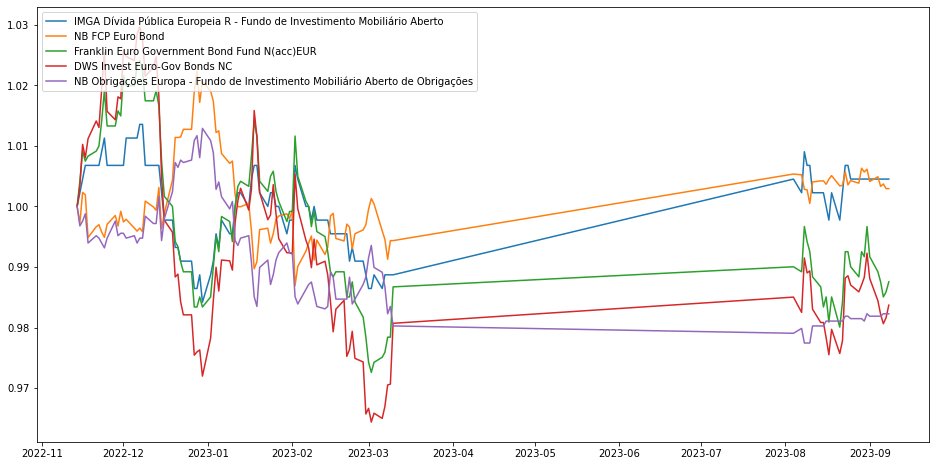

In [120]:
df = df_quotes[df_perform[df_perform['ft category'].isin(cats)].sort_values(by="1 week",ascending=False)[:5].index][:]
ax = df.apply(lambda x: x/df.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df.index.max(), axis='columns', ascending=False).plot(figsize=(16,8))
ax.legend(loc='upper left')
ax.plot()

In [16]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import cvxpy
cvxpy.installed_solvers()

['ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']

### Best Portofolio from a selected set of funds

In [187]:
### Inputs
# Funds to use
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>4)]['ft category'].index.tolist()
df_top_rated = df_quotes[selected_funds]
# Historical period to use
last_n = 20

mu = mean_historical_return(df_top_rated[-last_n:])
S = CovarianceShrinkage(df_top_rated).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
pd.DataFrame(cleaned_weights,columns=['symbol','w']).set_index(keys="symbol")['w'].sort_values(ascending=False)

ef.portfolio_performance(verbose=True)


Expected annual return: 30.3%
Annual volatility: 3.7%
Sharpe Ratio: 7.67


(0.3030751473182727, 0.03690358193457408, 7.670668603934794)

### Current portfolio performance

In [189]:
#####  Get the current Portofolio
portfolio_csv = 'portofolio.csv'
df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code')

#Remove funds that were sold
sold_funds = set()
# sold_funds = {'LU0425092995','LU1278917452','LU0628613639','IE0002167009','IE00B19Z6G02','LU0524465977','LU0740823439',
# 'LU0248173006','LU1670707956','LU0173614495','LU0269905138','LU1997245177'} 

#Select only funds that are in the portfolio and have quotes
df_portofolio = df_portofolio[df_portofolio.index.isin(set(df_portofolio.index) & set(df_quotes.columns) - sold_funds)]

#Add the last price to the portolio 
df_portofolio['Last Price'] = df_quotes[df_portofolio.index].iloc[-1]

#get the last USD change rate
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
usd2eur = exchange_rates.set_index('Date').iloc[0][0]

#Add the amount in EUR to the portolio
df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * df_portofolio['Last Price'] * df_portofolio['Quantidade']

df_portofolio

,Nome,Moeda,Quantidade,Last Price,Amount EUR
Code,,,,,
FR0000989915,Oddo BHF Immobilier CR,EUR,5.59800,1396.80,7819.286400
IE0002167009,JH Glob Tech and Innov A2,EUR,250.56600,19.09,4783.304940
IE00B19Z6G02,FTGF US Small A Accum,EUR,25.75300,380.83,9807.514990
IE00BLP5S460,Jupiter Glb Abs Rt EUR,EUR,5007.51100,1.44,7210.815840
LU0094557526,MFS European Research A1 EUR,EUR,196.82900,45.74,9002.958460
LU0108459040,Candriam Biotech C Cap USD,USD,3.60500,758.71,2554.574977
LU0119065240,JP US Growth D,USD,545.45500,27.44,13979.145031
LU0140363697,F Technology N,EUR,179.27600,27.77,4978.494520
LU0159053015,JPM US Technology D,EUR,156.42100,64.02,10014.072420


### Select Funds to Add for Max Sharpe Ratio (including existing)

In [190]:
def new_fund_performance(new_fund, amount=5000.0, risk_free_rate=0.05):
    new_portfolio = df_portofolio.copy()
    if new_fund in df_portofolio.index:
        new_portfolio.loc[new_fund,'Amount EUR'] += amount
    else:
        new_portfolio.loc[new_fund] = ["", df_perform.loc[new_fund]['currency'],1,amount,amount]

    mu = mean_historical_return(df_quotes[new_portfolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[new_portfolio.index]).ledoit_wolf()
    ef = EfficientFrontier(mu, S, solver='SCS')
    weights = new_portfolio["Amount EUR"] / new_portfolio["Amount EUR"].sum()
    ef.set_weights(weights)
    return ef.portfolio_performance(risk_free_rate=risk_free_rate)

In [191]:
# Get the current performance
mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
S = CovarianceShrinkage(df_quotes[df_portofolio.index]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
ef.set_weights(weights)

print("### Curent Performance")
print(ef.portfolio_performance(risk_free_rate=0.05))
ef.portfolio_performance(verbose=True, risk_free_rate=0.05)

current_return, current_volatility, current_sharpe_ratio = ef.portfolio_performance(risk_free_rate=0.05)

max_sharpe = current_sharpe_ratio
best_fund = None
amount = 5000.0

#new_fund = selected_funds[0]
for new_fund in selected_funds:

    try:
        _,_,new_sharpe = new_fund_performance(new_fund=new_fund)
        if new_sharpe > max_sharpe:
            max_sharpe = new_sharpe
            best_fund = new_fund
    except Exception as e:
        pass


print("### Performance with ", best_fund)
if best_fund is not None:
    print(new_fund_performance(new_fund=best_fund))
    print(df_perform.loc[best_fund])

### Curent Performance
(0.31324802643146465, 0.12534407921749727, 2.1002031214787276)
Expected annual return: 31.3%
Annual volatility: 12.5%
Sharpe Ratio: 2.10


### Performance with  LU1176912761
(0.31523860525099223, 0.12179795046474101, 2.177693501729124)
5 years                                                   0.0346
3 years                                                   0.0535
1 year                                                    -0.012
6 months                                                 -0.0394
3 months                                                  0.0371
1 month                                                   0.0248
ft category                            Equity Market Neutral EUR
name           JPMorgan Funds - Europe Equity Absolute Alpha ...
currency                                                     EUR
rating                                                         5
risk                                                           4
1 day                                                   0.003058
1 week                                                  0.013954
2 week                                                  0.

### Select New Funds to Add for Max Sharpe Ration

In [192]:
selected_funds_new = set(selected_funds) - set(df_portofolio.index)
mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
S = CovarianceShrinkage(df_quotes[df_portofolio.index]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
ef.set_weights(weights)

print("### Curent Performance")
print(ef.portfolio_performance(risk_free_rate=0.05))
ef.portfolio_performance(verbose=True, risk_free_rate=0.05)

current_return, current_volatility, current_sharpe_ratio = ef.portfolio_performance(risk_free_rate=0.05)

max_sharpe = current_sharpe_ratio
amount = 5000.0
funds_to_buy = []

n_funds_to_add = 4
for _ in range(n_funds_to_add):
    best_fund = None
    for new_fund in selected_funds_new:

        try:
            new_return,_,new_sharpe = new_fund_performance(new_fund=new_fund)
            if new_sharpe > max_sharpe:
                max_sharpe = new_sharpe
                best_fund = new_fund
        except Exception as e:
            pass
    
    if best_fund is None:
        print("\nNo more Funds found!")
        break
    else:
        funds_to_buy.append(best_fund)
        selected_funds_new -= {best_fund}

        print("### Performance with ", best_fund)
        if best_fund is not None:
            print(df_perform.loc[best_fund][['ft category','name']])
            print(new_fund_performance(new_fund=best_fund))
        
        

print("Funds to buy:",funds_to_buy)

### Curent Performance
(0.31324802643146465, 0.12534407921749727, 2.1002031214787276)
Expected annual return: 31.3%
Annual volatility: 12.5%
Sharpe Ratio: 2.10
### Performance with  LU0056886558
ft category                     EUR Cautious Allocation - Global
name           Fidelity Funds - SMART Global Defensive Fund A...
Name: LU0056886558, dtype: object
(0.31165394972400484, 0.12192881985577465, 2.1459565509902103)

No more Funds found!
Funds to buy: ['LU0056886558']


### Best Portofolio for the current return

In [208]:
mu = mean_historical_return(df_top_rated[-last_n:])
S = CovarianceShrinkage(df_top_rated).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
ef.efficient_return(target_return=current_return)
ef.portfolio_performance(verbose=True)
#weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
weights_df = pd.DataFrame(cleaned_weights,columns=['Code','Optimal']).set_index(keys="Code")['Optimal'].sort_values(ascending=False)
pd.concat([weights_df, weights], axis=1)

Expected annual return: 31.3%
Annual volatility: 3.8%
Sharpe Ratio: 7.66


,Optimal,Amount EUR
Code,,
LU1176912761,0.20563,0.014194
IE00B6116G19,0.13146,NaN
IE00B5ZNKR51,0.12801,NaN
LU0702159772,0.08441,NaN
LU0056886558,0.08088,NaN
LU0251130554,0.06833,NaN
LU1278917452,0.06627,0.043179
LU1786037017,0.04004,NaN
LU2034326152,0.03780,NaN
